In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import load_img, img_to_array

from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [2]:
img_height, img_width = 300, 300
batch_size = 32
class_num = 26
epochs = 100

In [3]:
train_path = './Data/Data_03 - Copy/Training/'
test_path = './Data/Data_03 - Copy/Testing/'

<function matplotlib.pyplot.show(close=None, block=None)>

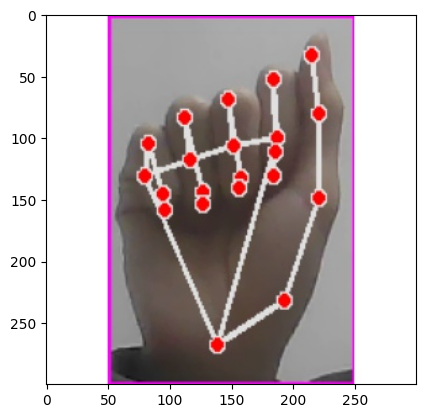

In [4]:
image = load_img(train_path + 'A/1710308002.1167984.jpg')
plt.imshow(image)
plt.show

In [5]:
image_arr = img_to_array(image)
image_arr.shape

(300, 300, 3)

In [6]:
# Load data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   zoom_range=0.3)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(300, 300),
                                                    batch_size=32,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_path, 
                                                  target_size=(300, 300),
                                                  batch_size=32,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

Found 7950 images belonging to 26 classes.
Found 5200 images belonging to 26 classes.


In [7]:
train_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'DD': 4,
 'E': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'Mu': 12,
 'Munguoc': 13,
 'N': 14,
 'O': 15,
 'P': 16,
 'Q': 17,
 'R': 18,
 'Rau': 19,
 'S': 20,
 'T': 21,
 'U': 22,
 'V': 23,
 'X': 24,
 'Y': 25}

In [8]:
stepsPerEpoch = train_generator.samples // batch_size
ValidationSteps = test_generator.samples // batch_size

In [9]:
# Create inceptionv3 model
incept_model = InceptionV3(input_shape=(300, 300, 3), include_top=False, weights='imagenet')
incept_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [10]:
# Freeze all convolutional InceptionV3 layers
for layer in incept_model.layers:
    layer.trainable = False

In [11]:
# Add some layer
x = Flatten()(incept_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(class_num, activation='softmax')(x)

In [12]:
model = Model(incept_model.input, x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  


 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                                 
                                                                                                  
 activation (Activation)        (None, 149, 149, 32  0           ['batch_normalization[0][0]']    
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 147, 147, 32  9216        ['activation[0][0]']             
          

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(train_generator,
          epochs=100,
          validation_data=test_generator,
          steps_per_epoch=stepsPerEpoch,
          validation_steps=ValidationSteps,
          verbose=1)

Epoch 1/100
248/248 [==============================] - 593s 2s/step - loss: 3.4168 - accuracy: 0.7067 - val_loss: 0.2506 - val_accuracy: 0.9271
Epoch 2/100
248/248 [==============================] - 611s 2s/step - loss: 0.7107 - accuracy: 0.7970 - val_loss: 0.3572 - val_accuracy: 0.8787
Epoch 3/100
248/248 [==============================] - 598s 2s/step - loss: 0.5963 - accuracy: 0.8263 - val_loss: 0.3073 - val_accuracy: 0.9196
Epoch 4/100
248/248 [==============================] - 563s 2s/step - loss: 0.6210 - accuracy: 0.8222 - val_loss: 0.3129 - val_accuracy: 0.9151
Epoch 5/100
248/248 [==============================] - 548s 2s/step - loss: 0.6058 - accuracy: 0.8145 - val_loss: 0.2445 - val_accuracy: 0.9290
Epoch 6/100
248/248 [==============================] - 606s 2s/step - loss: 0.5816 - accuracy: 0.8274 - val_loss: 0.2904 - val_accuracy: 0.9126
Epoch 7/100
248/248 [==============================] - 629s 3s/step - loss: 0.5425 - accuracy: 0.8310 - val_loss: 0.1899 - val_accuracy: